In [121]:
# import necessary library
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
def load_dataframe(path=None, nrows=100000):
    if not path:
        path = '~/data_analysis/data/tappware/dnothi/nisponno_records.csv'
    return pd.read_csv(path, nrows=nrows)

In [4]:
df = load_dataframe()
df.shape

(100000, 18)

In [34]:
# df.upokarvogi.nunique()
# df.shape[0]
df.head()

,id,nothi_master_id,nothi_part_no,type,nothi_onucched_id,potrojari_id,nothi_office_id,office_id,unit_id,designation_id,employee_id,upokarvogi,potrojari_internal_own,potrojari_internal_other,dak_srijito,operation_date,created,modified
0,1,1,1,potrojari,1.0,0,11,11,333,817,76,0,0,0,0,2016-02-10 00:00:00,2016-11-26 12:27:29,2016-11-26 12:27:29
1,2,3,5,potrojari,7.0,0,11,11,770,1810,478,0,0,0,0,2016-02-13 00:00:00,2016-11-26 12:27:29,2016-11-26 12:27:29
2,3,3,6,potrojari,10.0,0,11,11,770,1810,478,0,0,0,0,2016-02-13 00:00:00,2016-11-26 12:27:29,2016-11-26 12:27:29
3,4,7,10,potrojari,13.0,0,11,11,333,817,76,0,0,0,0,2016-11-16 00:00:00,2016-11-26 12:27:29,2016-11-26 12:27:29
4,5,9,12,potrojari,14.0,0,11,11,770,1810,478,0,0,0,0,2016-02-14 00:00:00,2016-11-26 12:27:29,2016-11-26 12:27:29


In [36]:
# Dataset overview
df.info(memory_usage='deep')
# df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  int64  
 1   nothi_master_id           100000 non-null  int64  
 2   nothi_part_no             100000 non-null  int64  
 3   type                      100000 non-null  object 
 4   nothi_onucched_id         85355 non-null   float64
 5   potrojari_id              100000 non-null  int64  
 6   nothi_office_id           100000 non-null  int64  
 7   office_id                 100000 non-null  int64  
 8   unit_id                   100000 non-null  int64  
 9   designation_id            100000 non-null  int64  
 10  employee_id               100000 non-null  int64  
 11  upokarvogi                100000 non-null  int64  
 12  potrojari_internal_own    100000 non-null  int64  
 13  potrojari_internal_other  100000 non-null  in

### General Insights / General questions we can answer:
    - কোন নির্দিষ্ট সালে/মাসে/দিনে উপকারভোগী সংখ্যা।
    - কোন নির্দিষ্ট সালে/মাসে/দিনে নোট নিষ্পন্ন সংখ্যা।
    - কোন নির্দিষ্ট সালে/মাসে/দিনে পত্রজারি সংখ্যা।
    - পত্রজারি এবং নোট নিষ্পন্নের হার বা অনুপাত।
    - Internal_own vs Internal_other পত্রজারির অনুপাত।

### Business Insights / Questions we can explore:
    - কোন নির্দিষ্ট সালে/মাসে/দিনে উপকারভোগী সংখ্যা।
    - কোন নির্দিষ্ট সালে/মাসে/দিনে নোট নিষ্পন্ন সংখ্যা।
    - কোন নির্দিষ্ট সালে/মাসে/দিনে পত্রজারি সংখ্যা।



### Rough 
- cummulative sum / year trend of upokarvogi, note_nisponno, potrojari

### উপকারভোগী সংখ্যা

In [81]:
df_upokarvogi = df[['upokarvogi', 'operation_date']].copy(deep=True)
df_upokarvogi['operation_date'] = pd.to_datetime(df_upokarvogi.operation_date)
# year summary
upokarvogi_summary = df_upokarvogi.groupby(df_upokarvogi.operation_date.dt.year)['upokarvogi'].sum().reset_index(name='upokarvogi')
upokarvogi_summary

,operation_date,upokarvogi
0,2016,5
1,2017,0


<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Upokarvogi by year')

Text(0, 0.5, 'upokarvogi count')

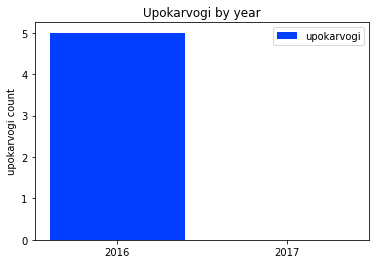

In [124]:
fig, ax = plt.subplots()

labels = []
for year in upokarvogi_summary.operation_date.values:
    labels.append(str(year))
    
height = upokarvogi_summary.upokarvogi.values

# Define searborn color palette to use
colors = sns.color_palette('bright')[0:len(labels)]


ax.bar(labels, height, label='upokarvogi', color=colors)
ax.set_title('Upokarvogi by year')
ax.set_ylabel('upokarvogi count')
ax.legend()
plt.show()


In [119]:
# list(upokarvogi_summary.upokarvogi.values)
# list(upokarvogi_summary.operation_date.values)

### নোট নিষ্পন্ন সংখ্যা


In [126]:
df_note_nisponno = df[df['type'] != 'potrojari'][['type', 'operation_date']]
df_note_nisponno['operation_date'] = pd.to_datetime(df_note_nisponno.operation_date)
# year summary
note_nisponno_summary = df_note_nisponno.groupby(df_note_nisponno.operation_date.dt.year).size().reset_index(name='note_nisponno')
note_nisponno_summary

,operation_date,note_nisponno
0,2016,57907
1,2017,22465


<BarContainer object of 2 artists>

Text(0.5, 1.0, 'note_nisponno by year')

Text(0, 0.5, 'note_nisponno count')

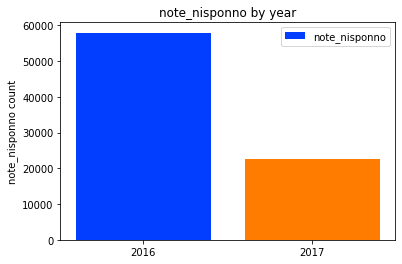

In [128]:
fig, ax = plt.subplots()

labels = []
for year in note_nisponno_summary.operation_date.values:
    labels.append(str(year))
    
height = note_nisponno_summary.note_nisponno.values

# Define searborn color palette to use
colors = sns.color_palette('bright')[0:len(labels)]


ax.bar(labels, height, label='note_nisponno', color=colors)
ax.set_title('note_nisponno by year')
ax.set_ylabel('note_nisponno count')
ax.legend()
plt.show()

### পত্রজারি সংখ্যা

In [129]:
df_potrojari = df[df['type'] == 'potrojari'][['type', 'operation_date']]
df_potrojari['operation_date'] = pd.to_datetime(df_potrojari.operation_date)
# year_summary
potrojari_summary = df_potrojari.groupby(df_potrojari.operation_date.dt.year).size().reset_index(name='potrojari')
potrojari_summary

,operation_date,potrojari
0,2016,13359
1,2017,6269


<BarContainer object of 2 artists>

Text(0.5, 1.0, 'potrojari by year')

Text(0, 0.5, 'potrojari count')

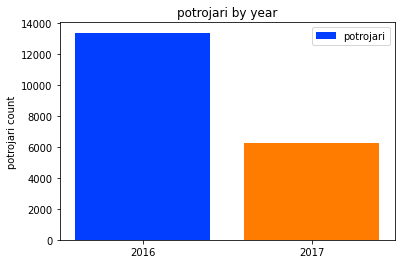

In [130]:
fig, ax = plt.subplots()

labels = []
for year in potrojari_summary.operation_date.values:
    labels.append(str(year))
    
height = potrojari_summary.potrojari.values

# Define searborn color palette to use
colors = sns.color_palette('bright')[0:len(labels)]


ax.bar(labels, height, label='potrojari', color=colors)
ax.set_title('potrojari by year')
ax.set_ylabel('potrojari count')
ax.legend()
plt.show()

### পত্রজারি এবং নোট নিষ্পন্নের হার বা অনুপাত।
 

In [80]:
df['type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
# df['type'].value_counts()

note         80.4%
potrojari    19.6%
Name: type, dtype: object

[None, None, None, None]

Text(0.5, 1.0, 'potrojari vs note nisponno')

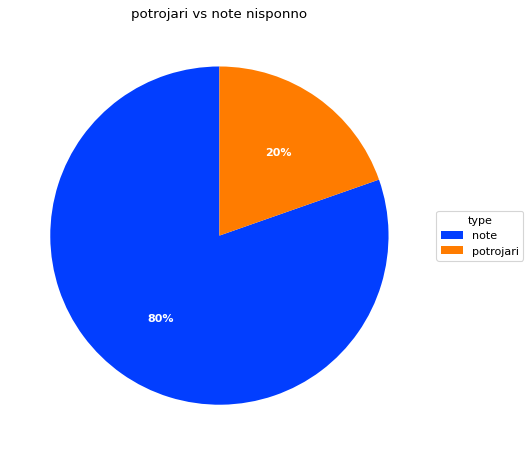

In [142]:
dak_type_summary = df.groupby('type').size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

# Define searborn color palette to use
colors = sns.color_palette('bright')[0:5]
# colors = sns.color_palette('pastel')[0:5]
wedges, texts, autotexts = ax.pie(dak_type_summary['counts'], 
                                  autopct='%.0f%%',
                                  textprops=dict(color="w"), 
                                  colors=colors,
                                  startangle=90,
                                 )

_ = ax.legend(wedges, dak_type_summary['type'], title="type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight=700)
ax.set_title("potrojari vs note nisponno")

plt.show()

### Internal own vs Internal other পত্রজারির অনুপাত


In [79]:
df.potrojari_internal_own.value_counts()
df.potrojari_internal_other.value_counts()


0    100000
Name: potrojari_internal_own, dtype: int64

0    100000
Name: potrojari_internal_other, dtype: int64